# Lab 4.1: Logistic regression

<a href="https://docs.google.com/presentation/d/1wxHKYyv1Px7yL4M7NmudDG4Fgm8g3WMDgBcOfT1kVug/edit#slide=id.g221f7757f7_0_0">
     <img src="http://www.deltanalytics.org/uploads/2/6/1/4/26140521/screen-shot-2019-01-06-at-3-36-17-pm_orig.png" width="500" height="400">
</a>


1. Let's remember that the objective of a _classification_ method is to assign an observation to a category or class.
2. Logistic regression is one of the methods we can use to do this and is arguably the most famous and well-used classifier. 
3. It *is* a regression, but don't let that confuse you. It estimates probabilities of class membership.
4. This notebook complements the Logistic Regression module by illustrating the coding/programming application of what was explained in class.

---

<a id='Notebook'></a>
### Notebook Structure
- [Importing Packages](#imporp)
- [Reading the dataset](#rds)
    - [Missing Values](#msvl)
     
- [Implementation of Logistic Regression](#implementation)
    - [Admissions](#addmission)
    - [Republican or Democrat](#repdemoc)


<a id='imporp'></a>
## Importing Packages
---

In [1]:
## Basic packages
import numpy as np
import pandas as pd

## Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Scikit learn and Statsmodel packages
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

## Operating system dependent functionality
import os

## Lines of code needed to make sure graph(s) appear in notebook, and check versions of packages
%matplotlib inline
%load_ext watermark
%config InlineBackend.figure_format = 'retina'
%watermark -v -d -a 'Delta Analytics' -p scikit-learn,matplotlib,numpy,pandas

ModuleNotFoundError: No module named 'watermark'

<a id='rds'></a>
## Reading the dataset
---
1. In this exercise we are using the admissions dataset.

In [2]:
data_directory = os.path.join('../datasets', 'admissions')
admission_filepath = os.path.join(data_directory, 'admissions.csv')
admissions = pd.read_csv(admission_filepath)
admissions.head(3)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0


In [3]:
admissions.tail(3)

,admit,gre,gpa,prestige
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


<a id='msvl'></a>
### Missing Values
---
1. If so, drop the missing values (no the best practice, but is ok for now)

In [4]:
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [5]:
admissions.dropna(inplace=True)

In [6]:
admissions.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [7]:
admissions.prestige.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

<a id='implementation'></a>
## Implementation of Logistic Regression
---


<a id='addmission'></a>
### Admissions
---

In [8]:
## Get some basic stats from your dataset
admissions.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [9]:
## lets set our prestige column as integer
admissions['prestige'] = admissions['prestige'].astype(int)

In [10]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.5 KB


### If you explore prestige you will see that this is a categorical column, and you can turn them into dummy variables => pandas has a nice predifine function to get dummies 
##### https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

### A few things you want to be careful here is:
1. Once you create your dummies we need to drop the prestige column (the original column)
2. We must drop one of the "new created" columns
3. Steps 1 and 2 are needed to avoid multicollinearity

In [11]:
get_dummies = pd.get_dummies(admissions.prestige, prefix="prestige", drop_first=True)
get_dummies.head(4)

,prestige_2,prestige_3,prestige_4
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,1


In [12]:
## now lets bring these new columns to our dataset using concat and add the intercept
df = pd.concat([admissions, get_dummies], axis=1)
df.drop(['prestige'], inplace=True, axis=1)
df['intercept'] = 1.0

## we have a dataset that is ready for analysis
df.head(4)

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0


In [13]:
'''Define y and X'''
y = df['admit'] 
columns_ = df.columns.tolist()
exclude_col = ['admit']
X = df[[i for i in columns_ if i not in exclude_col]]
print (X.shape, y.shape)

'''Split the data'''
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(397, 6) (397,)
(277, 6) (277,)
(120, 6) (120,)


/Users/Javier/anaconda2/envs/gds-scipy16/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
## Set up the regression
logit = sm.Logit(y_train, X_train)
logit_result = logit.fit()
## lets get the results
print (logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.589416
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  277
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Jan 2018   Pseudo R-squ.:                 0.09586
Time:                        21:45:10   Log-Likelihood:                -163.27
converged:                       True   LL-Null:                       -180.58
                                        LLR p-value:                 1.791e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.087      0.277      -0.001       0.004
gpa            0.9173      0.

/Users/Javier/anaconda2/envs/gds-scipy16/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:2405: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  return stats.chisqprob(self.llr, self.df_model)


In [15]:
print("Coeffieients")
print(logit_result.params)
print ("\n")
print("p-Values")
print(logit_result.pvalues)
print ("\n")
print("Dependent variables")
print(logit.endog_names)

Coeffieients
gre           0.001470
gpa           0.917260
prestige_2   -0.852635
prestige_3   -1.702499
prestige_4   -1.612396
intercept    -3.544092
dtype: float64


p-Values
gre           0.276981
gpa           0.019722
prestige_2    0.028627
prestige_3    0.000050
prestige_4    0.001544
intercept     0.007568
dtype: float64


Dependent variables
admit


## Interpreting logistic regression coefficients.
### Remember the odds ratio?
In this case, using the odds ratio will help us understand how 1 unit of increase or decrease in any of the variables affects the odds of being admitted.

In [16]:
print (np.exp(logit_result.params))

gre           1.001471
gpa           2.502425
prestige_2    0.426290
prestige_3    0.182227
prestige_4    0.199409
intercept     0.028895
dtype: float64


We can see that the odds of being admitted could potentially decrease by 42% if the prestige of school is 2, or by 18% if the prestige of the school is 3. These values are from our train set, now lets predict on our test set

## Predicting and Evaluating
If we call the predict method, we will get the predictive probabilities. But to make a prediction as to whether a student will be admitted or not, we must convert these predicted probabilities into class labels 1=admitted or 0 = no admitted. 

In [17]:
## Here we have the predictive probabilities
predictions = logit_result.predict(X_test)
print (predictions[:10])

109    0.371353
131    0.289760
357    0.634295
248    0.287423
78     0.527907
216    0.405133
26     0.663477
65     0.444836
181    0.296849
305    0.244167
dtype: float64


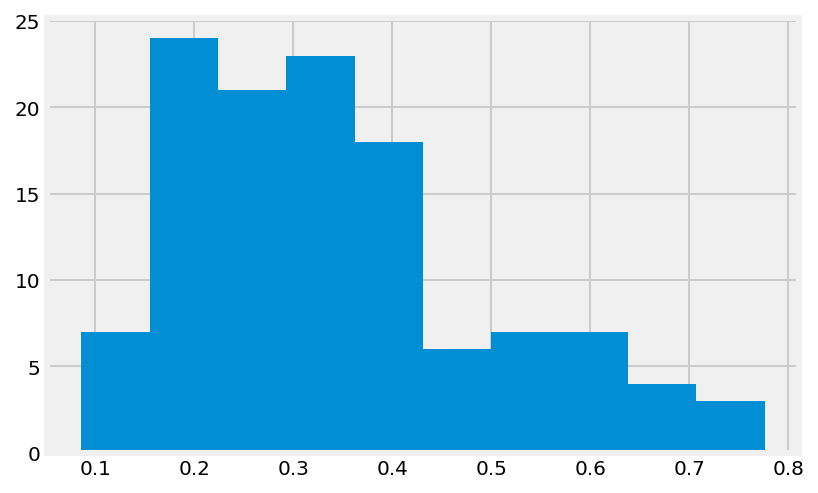

In [18]:
plt.hist(predictions);

In [19]:
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print (predictions_nominal.count(0))
print (predictions_nominal.count(1))

99
21


### Confusion matrix and Classification report
---

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
confmat = confusion_matrix(y_true=y_test, y_pred=predictions_nominal)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Rejected', 'True_Label_1 Admitted'],
                         columns=['Predict_Label_0 Rejected', 'Predict_Label_1 Admitted'])

confusion

,Predict_Label_0 Rejected,Predict_Label_1 Admitted
True_Label_0 Rejected,81,12
True_Label_1 Admitted,18,9


In [21]:
print (classification_report(y_test, predictions_nominal, digits=3))

             precision    recall  f1-score   support

          0      0.818     0.871     0.844        93
          1      0.429     0.333     0.375        27

avg / total      0.731     0.750     0.738       120



## Lets implement the same logistic regression using scikit learn
---

In [22]:
'''Baseline'''
'''Remeber that 0 is no admitted 1 is admitted'''
print (df['admit'].value_counts(), "\n" )
print ("if I randomly choose, %.0f percent of the time I/we will be choosing admitted " 
        % ((np.mean(df['admit']))*100))

0    271
1    126
Name: admit, dtype: int64 

if I randomly choose, 32 percent of the time I/we will be choosing admitted 


In [23]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred=logistic.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Rejected', 'True_Label_1 Admitted'],
                         columns=['Predict_Label_0 Rejected', 'Predict_Label_1 Admitted'])

confusion

,Predict_Label_0 Rejected,Predict_Label_1 Admitted
True_Label_0 Rejected,82,11
True_Label_1 Admitted,19,8


In [25]:
print (classification_report(y_test, y_pred, digits=3))

             precision    recall  f1-score   support

          0      0.812     0.882     0.845        93
          1      0.421     0.296     0.348        27

avg / total      0.724     0.750     0.733       120



<a id='repdemoc'></a>
### Republican or Democrat
---
For this exercise we are going to use data from the [1984 United States Congressional Voting Records Database] [1]
(take a look at the data dictionary) to predict if a congressmen/women is a republican or democrat 
[1]: http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names "1984 United States Congressional Voting Records Database"

In [26]:
## Define the colum/variable/feature names
columns = [
    "class", 
    "handicapped_infants", 
    "water_project_cost", 
    "adoption_of_the_budget_resolution", 
    "physician_fee_freeze",
    "el_salvador_aid",
    "religious_groups_in_schools",
    "anti_satellite_test_ban",
    "aid_to_nicaraguan_contras",
    "mx_missile",
    "immigration",
    "synfuels_corporation_cutback",
    "education_spending",
    "superfund_right_to_sue",
    "crime",
    "duty_free_exports",
    "export_administration_act_south_africa"
]


'''We are going to read the data directly from the web'''
csv_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

''' Here we are reading the data and create a binary var 0 for republican 1 for democrat'''
house_df = pd.read_csv(csv_url, names = columns)

house_df['class'] = house_df['class'].map(lambda value: 0 if value == "republican" else 1 )

In [27]:
house_df.head(3)

,class,handicapped_infants,water_project_cost,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,0,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,1,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [28]:
## Lets clean the dataset
house_df.replace('?', np.nan, inplace=True)
house_df.ffill(inplace=True)

In [29]:
## Create dummy var
df_dummies = pd.get_dummies(house_df)
df_dummies.head(3)

,class,handicapped_infants_n,handicapped_infants_y,water_project_cost_n,water_project_cost_y,adoption_of_the_budget_resolution_n,adoption_of_the_budget_resolution_y,physician_fee_freeze_n,physician_fee_freeze_y,el_salvador_aid_n,...,education_spending_n,education_spending_y,superfund_right_to_sue_n,superfund_right_to_sue_y,crime_n,crime_y,duty_free_exports_n,duty_free_exports_y,export_administration_act_south_africa_n,export_administration_act_south_africa_y
0,0,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,0,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
2,1,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0


In [30]:
'''Define y and X'''
y = df_dummies['class'] 
columns_ = df_dummies.columns.tolist()
exclude_col = ['class']

X = df_dummies[[i for i in columns_ if i not in exclude_col]]
print (X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(435, 32) (435,)
(304, 32) (304,)
(131, 32) (131,)


In [31]:
'''Use scikit learn'''
r_d_logistic = LogisticRegression()
r_d_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
'''Baseline'''
'''Remeber that 0 is republican 1 is democrat'''
print (df_dummies['class'].value_counts(), "\n" )
print ("if I randomly choose, %.0f percent of the time I/we will be choosing democrat" 
        % ((np.mean(df_dummies['class']))*100))

1    267
0    168
Name: class, dtype: int64 

if I randomly choose, 61 percent of the time I/we will be choosing democrat


In [33]:
## predicting
y_pred=r_d_logistic.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 Republican', 'True_Label_1 Democrat'],
                         columns=['Predict_Label_0 Republican', 'Predict_Label_1 Democrat'])

confusion

,Predict_Label_0 Republican,Predict_Label_1 Democrat
True_Label_0 Republican,49,2
True_Label_1 Democrat,3,77


### Let's get the TP, FP, TN, FN from the confusion matrix
---

In [34]:
TP = confusion.loc['True_Label_0 Republican', 'Predict_Label_0 Republican']  

FP = confusion.loc['True_Label_1 Democrat', 'Predict_Label_0 Republican']

TN = confusion.loc['True_Label_1 Democrat', 'Predict_Label_1 Democrat']

FN = confusion.loc['True_Label_0 Republican', 'Predict_Label_1 Democrat']

values = sorted(zip(['True Positives','False Positives','True Negatives','False Negatives'], [TP, FP, TN, FN]))
values

[('False Negatives', 2),
 ('False Positives', 3),
 ('True Negatives', 77),
 ('True Positives', 49)]

### Calculate accuracy, Misclassification Rate (Error Rate), Precision,  Recall
---

In [35]:
## Accuracy
## How often is the classifier correct?
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print ("Accuracy score: %.3f" %(acc*100))

Accuracy score: 96.183


In [36]:
## Misclassification Rate (Error Rate)
## How often is the model wrong
print ("Error rate: %.3f" % (((FP + FN))/ float(len(y_test))*100))

Error rate: 3.817


In [37]:
## Precision
## Ability of the classifier to avoid labeling a class as a member of another class
from sklearn.metrics import precision_score

pcs = precision_score(y_test, y_pred)
print ("Precision: %.3f" %(pcs*100))

Precision: 97.468


In [38]:
## Recall
## Recall the ability of the classifier to correctly identify the current class
from sklearn.metrics import recall_score

rcs = recall_score(y_test, y_pred)
print ("Recall: %.3f" % (rcs*100))

Recall: 96.250


In [39]:
print (classification_report(y_test, y_pred, digits=3))

             precision    recall  f1-score   support

          0      0.942     0.961     0.951        51
          1      0.975     0.963     0.969        80

avg / total      0.962     0.962     0.962       131



### ROC and AUC
---

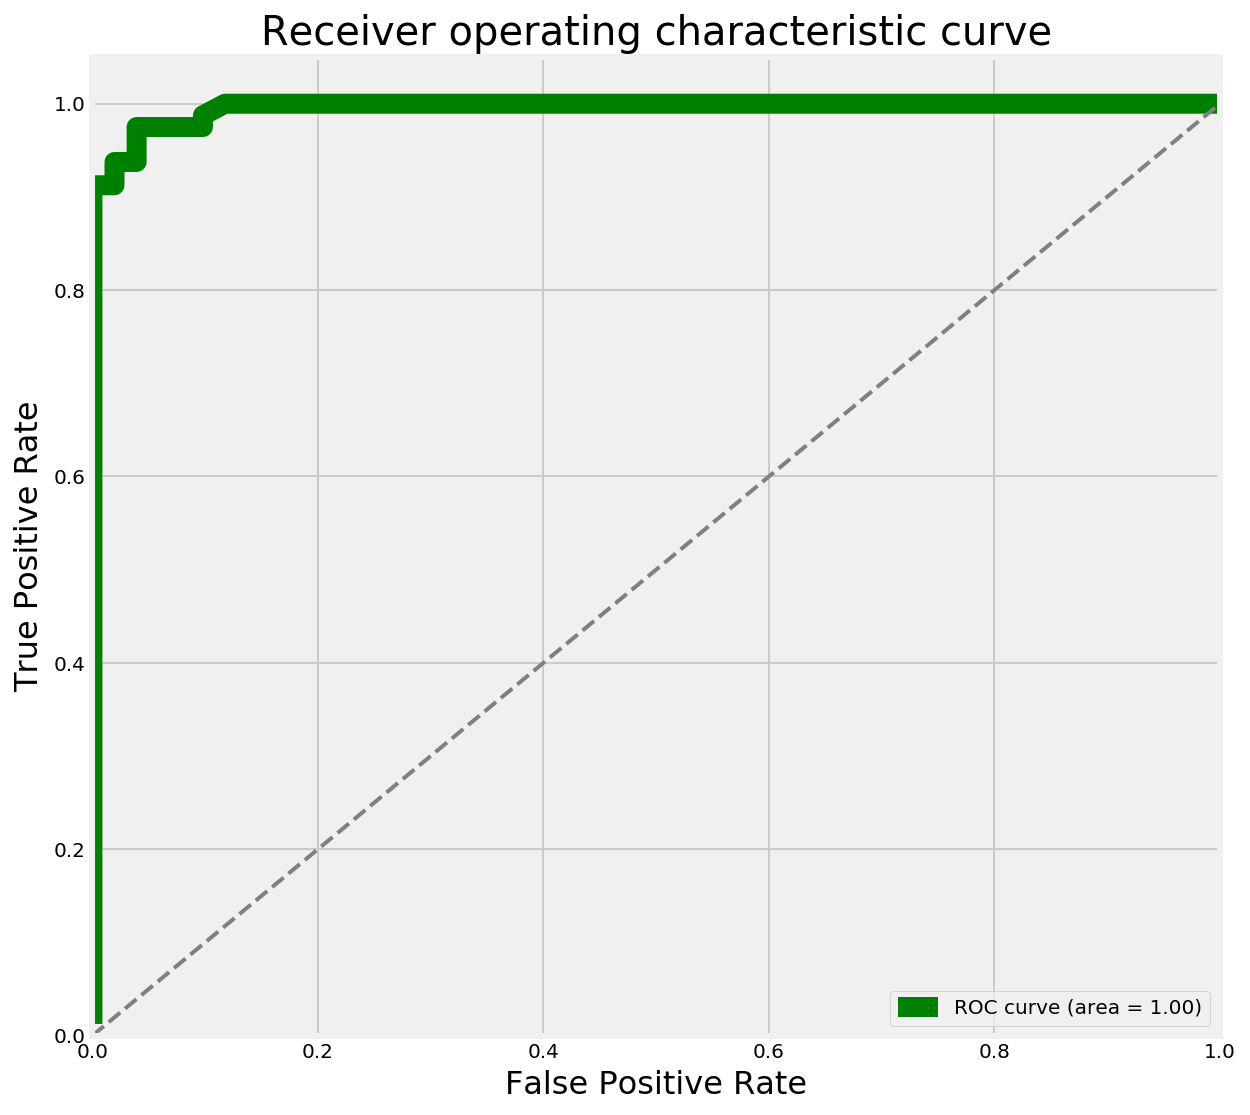

In [40]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = r_d_logistic.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()